<a href="https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch?scriptVersionId=112860104" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Beta of a Security 

Beta of the security measures how the given security performs in comparision to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,
1. $\beta = 0$ No relation to the market (i.e S&P500)
2. $\beta = 1$ Performs same as the market
3. $\beta < 1$ Lose less in recession and makes less in flourishing economy
4. $\beta > 1$ Lose more in recession and makes more in flourinshing economy
5. $\beta < 0$ Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa.

We shall, try to find Beta for tesla. To find beta one usually, considers last 5 year data with monthly period.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt, timedelta as td
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
sns.set()
import pandas_datareader as web

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

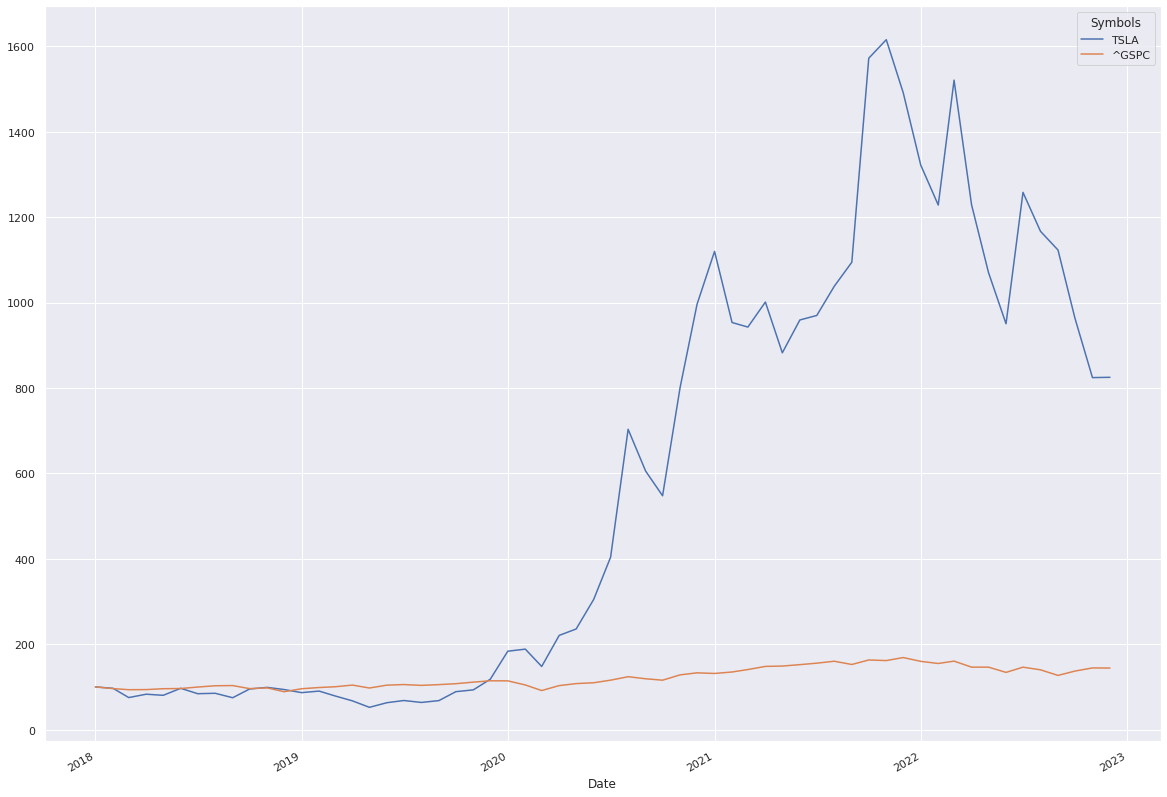

In [2]:
stocks = 'TSLA ^GSPC'.split()
df = web.get_data_yahoo(stocks, start=dt.today() - td(days=365*5), 
                       interval='m')['Adj Close']
(df * 100 / df.iloc[0]).plot(figsize=(20,15));

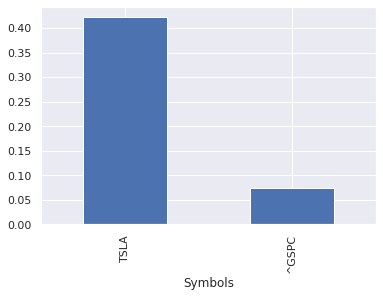

In [3]:
df_return = np.log(df / df.shift())
(df_return.mean() * 12).plot.bar();

TSLA is about 44% annual return, while S&P is about 8%, so we expect beta is more than 1.

$$\beta = \frac{\textit{Cov}(TSLA, S\& P)}{\textit{Var}(S\& P)}$$

In [4]:
cov = df_return.cov() * 12 # annualized
cov

Symbols,TSLA,^GSPC
Symbols,,
TSLA,0.410791,0.057318
^GSPC,0.057318,0.033887


In [5]:
market_cov = cov.iloc[0,1]
var_market = cov.iloc[1,1]
beta_tsla = market_cov / var_market
print(f'Beta (5Y period) of TSLA is : {beta_tsla}')

Beta (5Y period) of TSLA is : 1.6914248855416543


In [6]:
def get_beta(stock, start=dt.today() - td(days=365*5)):
    df = web.get_data_yahoo([stock, '^GSPC'], start=start, interval='m')['Adj Close']
#     (df * 100 / df.iloc[0]).plot(figsize=(20,15))
    
    df_return = np.log(df / df.shift())
#     df_return = df.pct_change()
    (df_return.mean() * 12).plot.bar()
    plt.title(f'Annual log return of {stock.upper()}')
    cov = df_return.cov() * 12
    market_cov = cov.iloc[0,1]
    var_market = cov.iloc[1,1]
    beta = market_cov / var_market
    print(f'Beta (5Y monthly period) of {stock.upper()} is : {beta}')
    return beta
    

One could try simple returns or log returns.

Beta (5Y monthly period) of PG is : 0.4426464827489228


0.4426464827489228

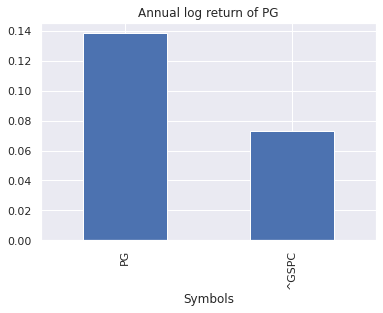

In [7]:
get_beta('PG')

Beta (5Y monthly period) of TSLA is : 1.6914248855416543


1.6914248855416543

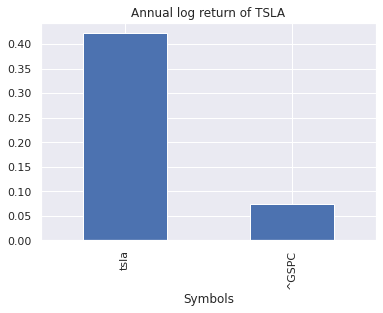

In [8]:
get_beta('tsla')

One can always google Beta value and one can see that it will be nearby.  

# Capital Asset Pricing Model (CAPM)

- Reward for the risk taken is given by CAPM. 
- $\beta \cdot $(Market Return - Risk-Free Return) is the reward for risk taken.

Return of investement = Risk-Free Return + $\beta \cdot $(Market Return - Risk-Free Return)

- (Market Return - Risk-Free Return) is called Market risk premium. Market research tell that this value is about 10 %
- Risk-Free Return is about 2.5 %

**Assumptions**
There are some assumptions made for CAPM model, which often not true in reality. However, CAPM is widely used. 
- Inverstors are risk averse, market is rational and all the info about market is distributed to all investors
- Infinite amount of money is available to borrow
- Investors has same time to evaluate the information
- Risk and return are linearly related
- NO inflation, taxes or transaction cost

Let us calculate the return for TSLA.

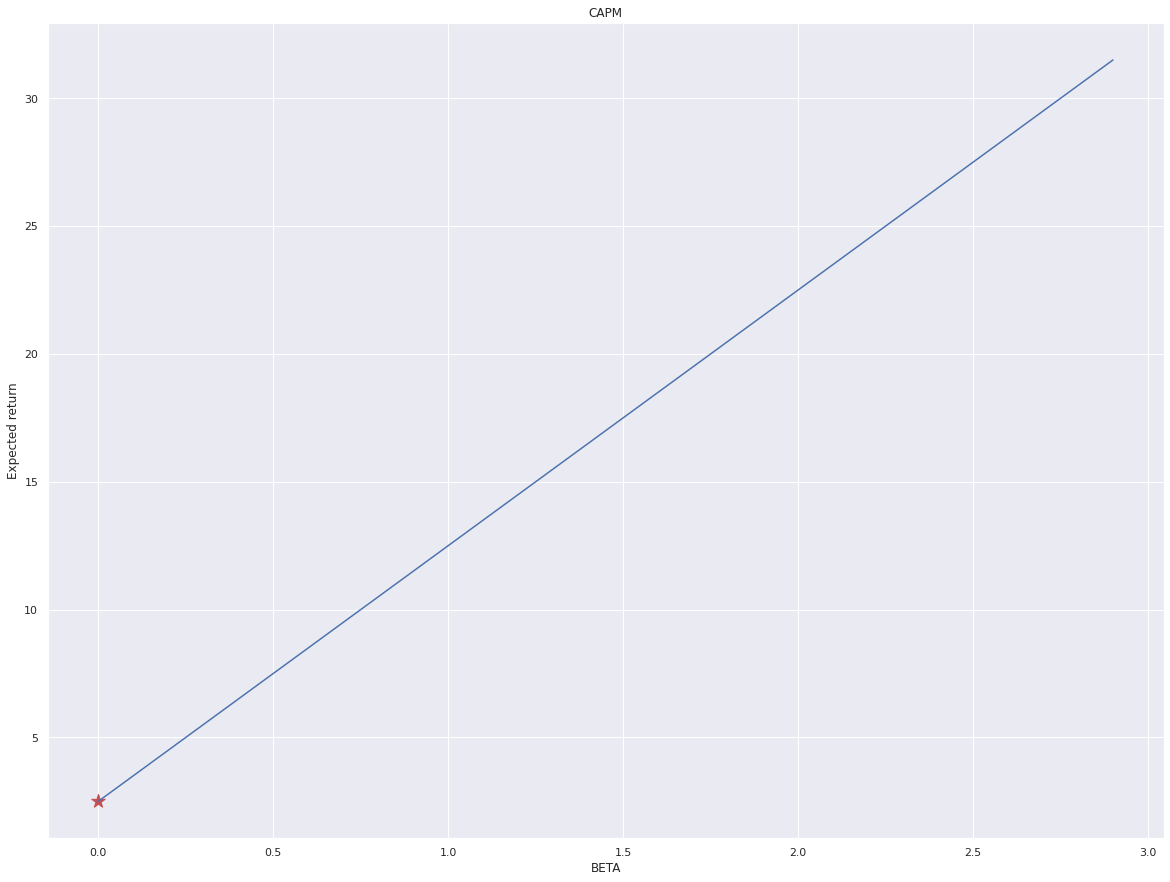

In [9]:
# CAPM graph
risk_premium=10 
risk_free=2.5
betas = np.arange(0,3,.1)
exp_ret = risk_free + betas * risk_premium
plt.figure(figsize=(20,15))
plt.plot(betas, exp_ret)
plt.xlabel('BETA')
plt.ylabel('Expected return')
plt.title('CAPM')
plt.scatter(betas[0],risk_free, marker='*', s=200, c='r');

In [10]:
def get_return(stock, start=dt.today() - td(days=365*5), risk_premium=10, risk_free=2.5):
    '''The average return of the stock market over the long term is just above 10%, as measured 
    by the S&P 500 index. Over the past decade, through to March 31, 2022, the annualized performance of the S&P 500 
    was 14.5%
    
    Risk free rate in US as of 30th Nov is 2.5%'''
    beta = get_beta(stock, start)
    # risk_premium = market return - risk free return
    result = risk_free + beta * risk_premium
    print(f'Expected annual return for {stock.upper()} is {result} %\n')
    return result

Beta (5Y monthly period) of PG is : 0.4426470529343568
Expected annual return for PG is 6.926470529343568 %



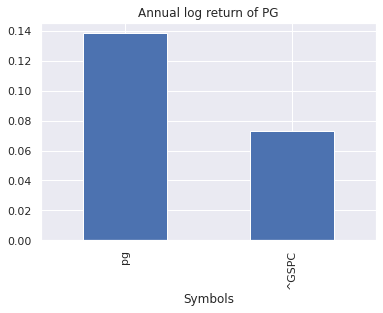

In [11]:
ret = get_return('pg')

Beta (5Y monthly period) of TSLA is : 1.6914248855416543
Expected annual return for TSLA is 19.41424885541654 %



19.41424885541654

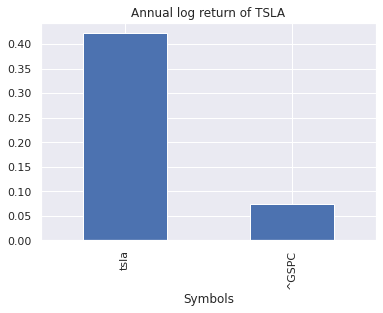

In [12]:
get_return('tsla')

# Sharpe Ratio (SR)

- Measure of return per unit of risk
- SR >= 1 is acceptable. At least 2 or 3 is considered to be very good.
- SR < 1 is not good investment.
- Coefficient of variation measure risk per unit of return (we will explore this sometime)

$$ SR = \Large\frac{r_i - r_f}{\sigma_i}, $$ 
- $r_i$ : Stock i return
- $r_f$ : Risk Free return
- $\sigma_i$ : Stock i std

**Good to know** 
- The Sharpe Ratio, while a useful risk/return measure, is not a perfect. 
- Works well with normally distributed returns, or with return distributions with a minimal presence of skewness and kurtosis.
- Market returns are normal, they have fat tails.



In [13]:
def get_sharpe(stock, start=dt.today()-td(365*5)):
    df = web.get_data_yahoo(stock,start=start)['Adj Close']
#     log_ret = np.log(df / df.shift())
    ret = df.pct_change()
#     ret = np.log(df / df.shift())
    ri = ret.mean()
    # ri is investment return calculated using CAPM
#     ri = get_return(stock) / 100    
    # ri2 is mean log return 
#     ri2 = log_ret.mean() 
    rf = (.025 / 365) # as we are making it daily. Since interest accrues on weekend we did 365
#     rf = 0 # we take risk free rate = 0
#     sigma = log_ret.std() 
    sigma = ret.std()

    sr = (ri - rf) * 250 ** .5 / sigma # annualize the sharpe ratio
#     sr1 = (ri2 - rf) * 250 ** .5/ sigma
#     print(f'Sharpe Ratio, using CAPM and Mean log return, of {stock.upper()} are : {sr, sr1} respectively')
    print(f'Sharpe Ratio of {stock.upper()} is : {sr}')
#     return sr, sr1, ri, ri2
    return sr

In [14]:
get_sharpe('amzn')

Sharpe Ratio of AMZN is : 0.41318165457685885


0.41318165457685885

In [15]:
get_sharpe('pg')

Sharpe Ratio of PG is : 0.6102354700064767


0.6102354700064767

In [16]:
get_sharpe('tsla')

Sharpe Ratio of TSLA is : 0.9908882440354861


0.9908882440354861

In [17]:
get_sharpe('aapl')

Sharpe Ratio of AAPL is : 0.8920647757562946


0.8920647757562946

In [18]:
get_sharpe('^gspc')

Sharpe Ratio of ^GSPC is : 0.4274806127267139


0.4274806127267139